<a href="https://colab.research.google.com/github/Dhruv36/Image-Data-Augmentation-/blob/master/Image%20Data%20Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Data Augmentation with Keras


# Task 1: Import Libraries

In [0]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.2.0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 2: Rotation

In [0]:
#ImageDataGenerator class 

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 40) 

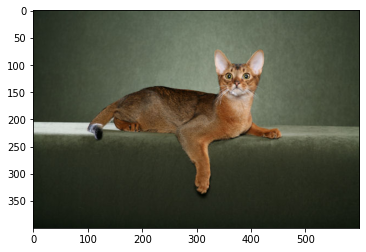

In [0]:
image_path = '/content/drive/My Drive/Image Data Augmentation/images /train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


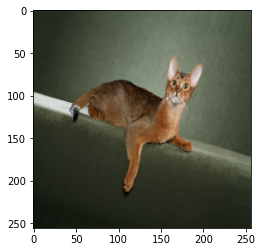

In [0]:
x, y = next(generator.flow_from_directory('/content/drive/My Drive/Image Data Augmentation/images ', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-90, -60, 0, 60, 90],
    height_shift_range=[-70, 0, 70]
)

Found 1 images belonging to 1 classes.


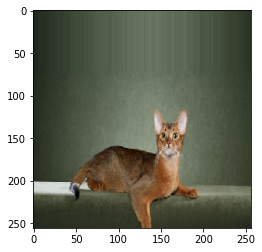

In [0]:
x, y = next(generator.flow_from_directory('/content/drive/My Drive/Image Data Augmentation/images ', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


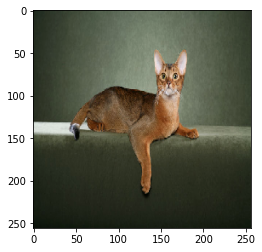

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0.5, 2.)
)

x, y = next(generator.flow_from_directory('/content/drive/My Drive/Image Data Augmentation/images ', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


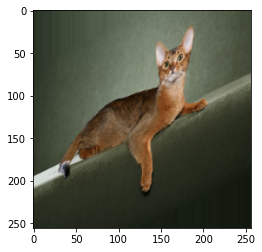

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=30
)

x, y = next(generator.flow_from_directory('/content/drive/My Drive/Image Data Augmentation/images ', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


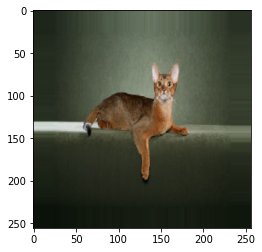

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=[0.3, 1.6]
)

x, y = next(generator.flow_from_directory('/content/drive/My Drive/Image Data Augmentation/images ', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


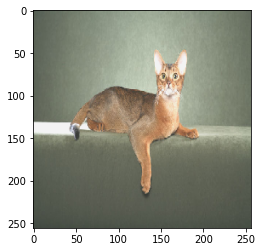

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=90
)

x, y = next(generator.flow_from_directory('/content/drive/My Drive/Image Data Augmentation/images ', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 8: Flips

Found 1 images belonging to 1 classes.


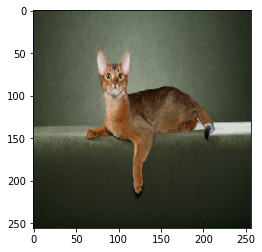

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('/content/drive/My Drive/Image Data Augmentation/images ', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.1742748 0.7388894 [[0]]
120.70756512369792


### Samplewise

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-4.9670536e-08 1.0 [[7]]


# Task 10: Rescale and Preprocessing Function

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [0]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [0]:
print(x.mean(), x.std(), y)

0.096859716 0.19034567 [[2]]


# Task 11: Using in Model Training

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip = True,
    rotation_range = 20
)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top=False, input_shape=(32,32,3),
        pooling = 'avg'
    ),
    tf.keras.layers.Dense(10, activation= 'softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size =32),
    epochs=10, steps_per_epoch=100
)

Epoch 1/10
100/100 [==============================] - 26s 260ms/step - loss: 2.3131 - accuracy: 0.1216
Epoch 2/10
100/100 [==============================] - 24s 244ms/step - loss: 1.8917 - accuracy: 0.1053
Epoch 3/10
100/100 [==============================] - 25s 245ms/step - loss: 1.8081 - accuracy: 0.1069
Epoch 4/10
100/100 [==============================] - 24s 243ms/step - loss: 1.8108 - accuracy: 0.0847
Epoch 5/10
100/100 [==============================] - 24s 243ms/step - loss: 1.8887 - accuracy: 0.0787
Epoch 6/10
100/100 [==============================] - 24s 243ms/step - loss: 1.8434 - accuracy: 0.1044
Epoch 7/10
100/100 [==============================] - 24s 243ms/step - loss: 1.6902 - accuracy: 0.0984
Epoch 8/10
100/100 [==============================] - 25s 245ms/step - loss: 1.6835 - accuracy: 0.0737
Epoch 9/10
100/100 [==============================] - 24s 244ms/step - loss: 1.7260 - accuracy: 0.0644
Epoch 10/10
100/100 [==============================] - 24s 243ms/step - l